# DS7333 Russian House Data Case Study
#### 03/14/2021
#### Tom Gianelle, Yang Zhang and Michael Weatherford

# Table of contents
1. [Data](#data)
2. [Explortory Data Analysis](#eda)
3. [Initial Imputation Analysis](#impute)
4. [Initial Modeling](#modeling)
4. [Modeling and Cross Validation](#min1)

## Data <a name="data"></a>

In [3]:
import pandas as pd
import xgboost as xgb

# required libraries
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
# ignore warnings
warnings.filterwarnings("ignore")

# For multiple line outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [109]:
train = pd.read_csv("C:/Users/taniat470s/Desktop/SMU_course/DS7333/CaseStudy10/train.csv")

In [5]:
train_org = train

In [6]:
train

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,30469,2015-06-30,44,27.0,7.0,9.0,1.0,1975.0,2.0,6.0,...,15,5,0,15,26,1,2,84,6,7400000
30467,30470,2015-06-30,86,59.0,3.0,9.0,2.0,1935.0,4.0,10.0,...,313,128,24,98,182,1,82,171,15,25000000
30468,30471,2015-06-30,45,NaN,10.0,20.0,1.0,NaN,1.0,1.0,...,1,1,0,2,12,0,1,11,1,6970959
30469,30472,2015-06-30,64,32.0,5.0,15.0,1.0,2003.0,2.0,11.0,...,22,1,1,6,31,1,4,65,7,13500000


In [24]:
pd.options.display.min_rows = 290
train.isnull().sum(axis=0)

id                                           0
full_sq                                      0
life_sq                                   6383
floor                                      167
max_floor                                 9572
material                                  9572
build_year                               13605
num_room                                  9572
kitch_sq                                  9572
state                                    13559
product_type                                 0
area_m                                       0
raion_popul                                  0
green_zone_part                              0
indust_part                                  0
children_preschool                           0
preschool_quota                           6688
preschool_education_centers_raion            0
children_school                              0
school_quota                              6685
school_education_centers_raion               0
school_educat

In [17]:
train.isnull().sum().sum()

261026

In [25]:
obj = train.isnull().sum()
for key,value in obj.iteritems():
    print(key,",",value)

id , 0
full_sq , 0
life_sq , 6383
floor , 167
max_floor , 9572
material , 9572
build_year , 13605
num_room , 9572
kitch_sq , 9572
state , 13559
product_type , 0
area_m , 0
raion_popul , 0
green_zone_part , 0
indust_part , 0
children_preschool , 0
preschool_quota , 6688
preschool_education_centers_raion , 0
children_school , 0
school_quota , 6685
school_education_centers_raion , 0
school_education_centers_top_20_raion , 0
hospital_beds_raion , 14441
healthcare_centers_raion , 0
university_top_20_raion , 0
sport_objects_raion , 0
additional_education_raion , 0
culture_objects_top_25 , 0
culture_objects_top_25_raion , 0
shopping_centers_raion , 0
office_raion , 0
thermal_power_plant_raion , 0
incineration_raion , 0
oil_chemistry_raion , 0
radiation_raion , 0
railroad_terminal_raion , 0
big_market_raion , 0
nuclear_reactor_raion , 0
detention_facility_raion , 0
full_all , 0
male_f , 0
female_f , 0
young_all , 0
young_male , 0
young_female , 0
work_all , 0
work_male , 0
work_female , 0
ekde

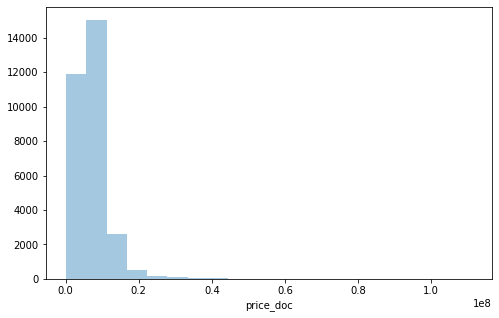

In [39]:
f, ax = plt.subplots(figsize=(8, 5))
sns.distplot(train.price_doc, bins=20, kde=False,ax=ax)
plt.show()

In [173]:
corr_targ = train.corrwith(train["life_sq"])
corr_targ.sort_values(ascending=False)

life_sq                    1.000000
num_room                   0.191024
price_doc                  0.165606
full_sq                    0.161112
build_count_before_1920    0.082077
                             ...   
state                     -0.066633
ekder_female              -0.066721
build_count_1971-1995     -0.083902
build_count_panel         -0.093463
build_count_block         -0.109769
Length: 279, dtype: float64

In [174]:
corr_targ = train.corrwith(train["num_room"])
corr_targ.sort_values(ascending=False)

num_room              1.000000
full_sq               0.695444
price_doc             0.476337
life_sq               0.191024
trc_count_5000        0.095754
                        ...   
bulvar_ring_km       -0.063461
sadovoe_km           -0.063814
zd_vokzaly_avto_km   -0.069856
office_km            -0.072016
catering_km          -0.076849
Length: 279, dtype: float64

In [146]:
train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Data columns (total 290 columns):
 #   Column                                 Dtype  
---  ------                                 -----  
 0   id                                     int64  
 1   full_sq                                int64  
 2   life_sq                                float64
 3   floor                                  float64
 4   max_floor                              float64
 5   material                               float64
 6   build_year                             float64
 7   num_room                               float64
 8   kitch_sq                               float64
 9   state                                  float64
 10  product_type                           object 
 11  area_m                                 float64
 12  raion_popul                            int64  
 13  green_zone_part                        float64
 14  indust_part                            float64
 15  c

## EDA <a name="eda"></a>

[Text(0, 0, 'metro_min_walk'),
 Text(0, 0, 'metro_km_walk'),
 Text(0, 0, 'ID_railroad_station_walk'),
 Text(0, 0, 'railroad_station_walk_min'),
 Text(0, 0, 'railroad_station_walk_km'),
 Text(0, 0, 'floor'),
 Text(0, 0, 'prom_part_5000'),
 Text(0, 0, 'cafe_avg_price_5000'),
 Text(0, 0, 'cafe_sum_5000_min_price_avg'),
 Text(0, 0, 'cafe_sum_5000_max_price_avg'),
 Text(0, 0, 'cafe_avg_price_3000'),
 Text(0, 0, 'cafe_sum_3000_max_price_avg'),
 Text(0, 0, 'cafe_sum_3000_min_price_avg'),
 Text(0, 0, 'cafe_avg_price_2000'),
 Text(0, 0, 'cafe_sum_2000_max_price_avg'),
 Text(0, 0, 'cafe_sum_2000_min_price_avg'),
 Text(0, 0, 'cafe_avg_price_1500'),
 Text(0, 0, 'cafe_sum_1500_max_price_avg'),
 Text(0, 0, 'cafe_sum_1500_min_price_avg'),
 Text(0, 0, 'build_count_after_1995'),
 Text(0, 0, 'build_count_1946-1970'),
 Text(0, 0, 'build_count_1921-1945'),
 Text(0, 0, 'build_count_1971-1995'),
 Text(0, 0, 'raion_build_count_with_builddate_info'),
 Text(0, 0, 'build_count_mix'),
 Text(0, 0, 'build_count_sl

Text(0.5, 0, 'Count of missing values')

Text(0.5, 1.0, 'Number of missing values in each column')

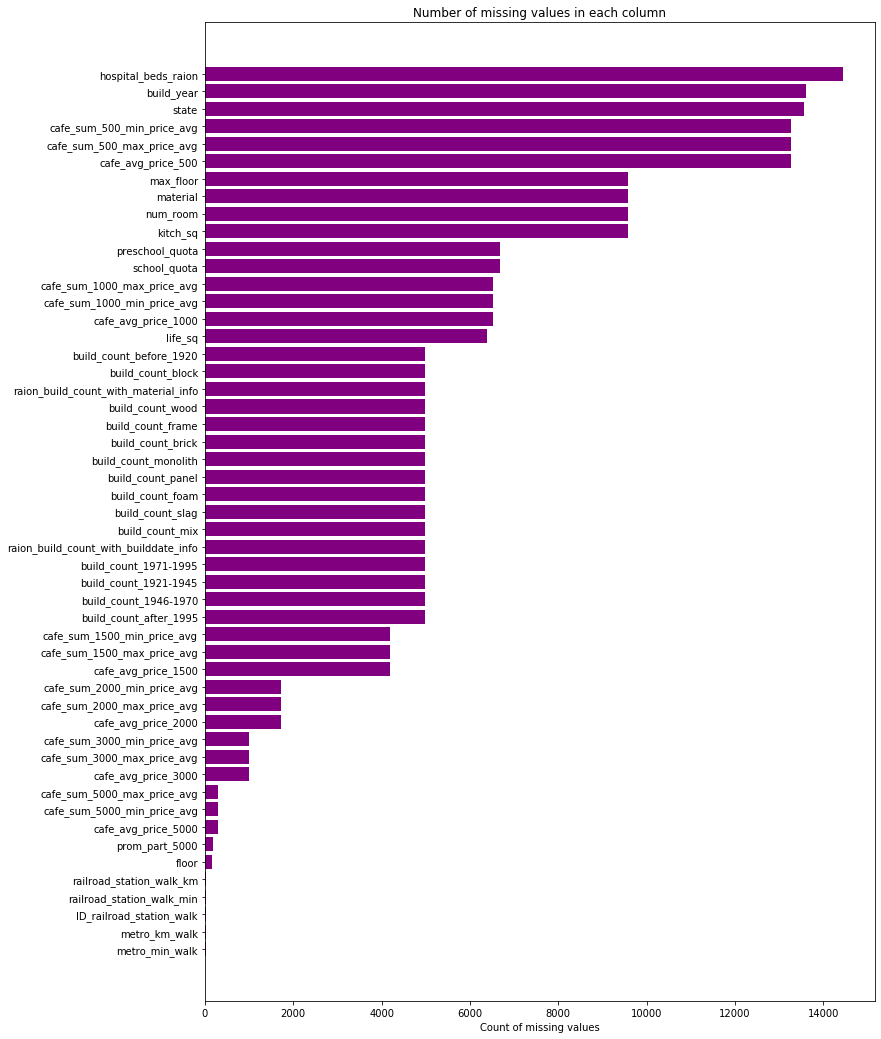

In [11]:
missing_df = train.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.loc[(missing_df['missing_count'] > 0), :]
missing_df = missing_df.sort_values(by='missing_count')
ind = range(missing_df.shape[0])

fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind, missing_df['missing_count'], color="purple")
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()

In [16]:
train['timestamp'] = pd.to_datetime(train['timestamp'])

In [17]:
# year and month
train['yearmonth'] = train['timestamp'].dt.year*100 + train['timestamp'].dt.month
train['yearmonth']

0        201108
1        201108
2        201108
3        201109
4        201109
          ...  
30466    201506
30467    201506
30468    201506
30469    201506
30470    201506
Name: yearmonth, Length: 30471, dtype: int64

<Figure size 864x576 with 0 Axes>

Text(0, 0.5, 'price_doc')

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

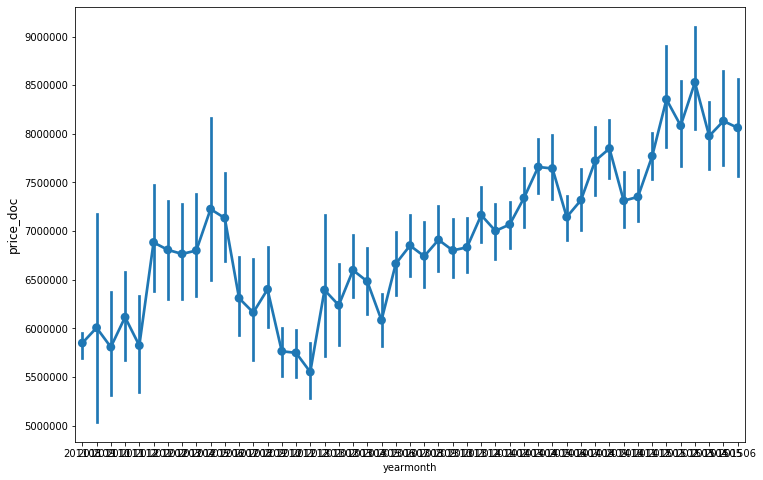

In [18]:
plt.figure(figsize=(12,8))
sns.pointplot(x=train['yearmonth'], y='price_doc', data=train)
plt.ylabel('price_doc', fontsize=12)
plt.xlabel(train['yearmonth'], fontsize=12)
plt.title('Median Price distribution by year and month_num')
plt.xticks(rotation='vertical')
plt.show()

In [19]:
# year
train['year'] = train['timestamp'].dt.year

# month of year
train['month_of_year'] = train['timestamp'].dt.month

<Figure size 864x576 with 0 Axes>

Text(0, 0.5, 'price_doc')

Text(0.5, 0, 'month_of_year')

Text(0.5, 1.0, 'Median Price distribution by month_of_year')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

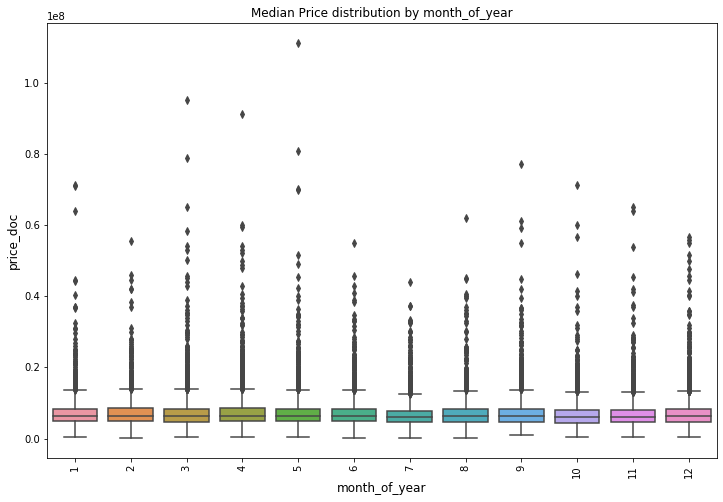

In [20]:
plt.figure(figsize=(12,8))
sns.boxplot(x='month_of_year', y='price_doc', data=train)
plt.ylabel('price_doc', fontsize=12)
plt.xlabel('month_of_year', fontsize=12)
plt.title('Median Price distribution by month_of_year')
plt.xticks(rotation='vertical')
plt.show()

<Figure size 1440x576 with 0 Axes>

Text(0, 0.5, 'price_doc')

Text(0.5, 0, 'sub_area')

Text(0.5, 1.0, 'Median Price distribution by sub_area')

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145]),
 <a list of 146 Text xticklabel objects>)

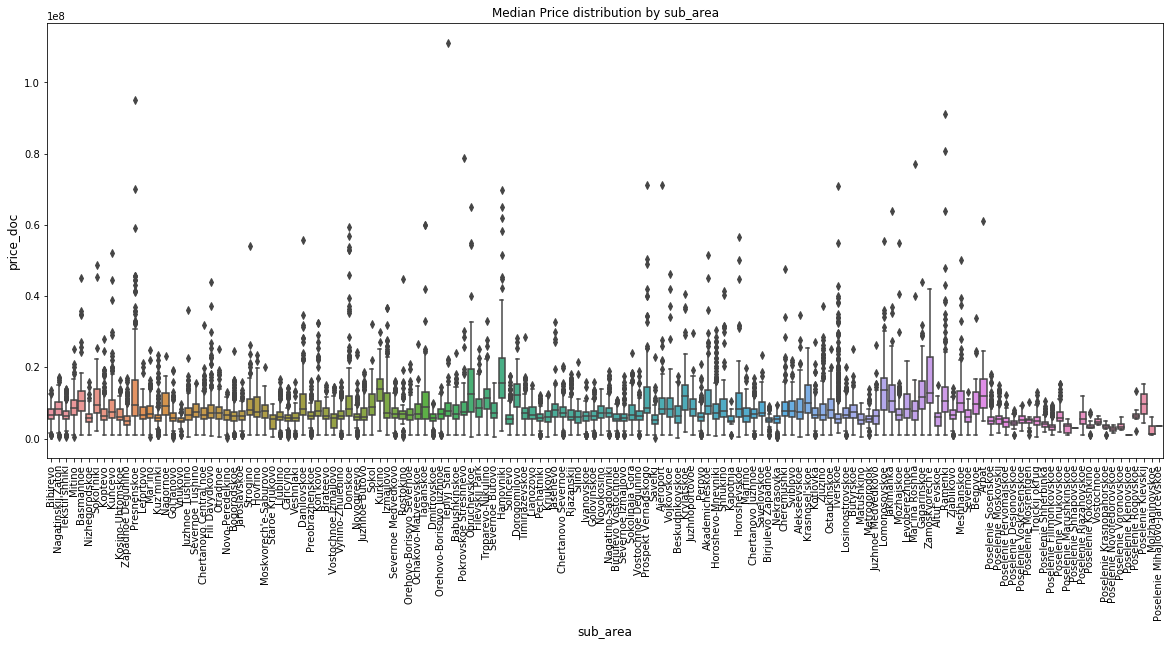

In [239]:
plt.figure(figsize=(20,8))
sns.boxplot(x='sub_area', y='price_doc', data=train)
plt.ylabel('price_doc', fontsize=12)
plt.xlabel('sub_area', fontsize=12)
plt.title('Median Price distribution by sub_area')
plt.xticks(rotation='vertical')
plt.show()

<Figure size 864x576 with 0 Axes>

Text(0, 0.5, 'price_doc')

Text(0.5, 0, 'state')

Text(0.5, 1.0, 'Median Price distribution by state')

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

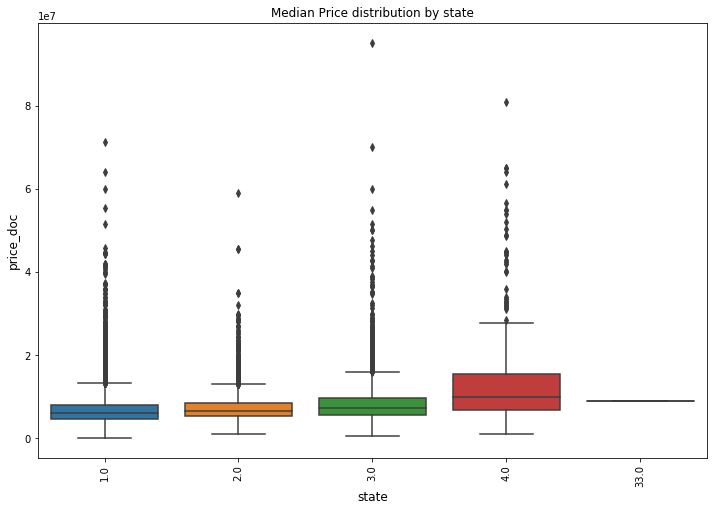

In [149]:
plt.figure(figsize=(12,8))
sns.boxplot(x='state', y='price_doc', data=train)
plt.ylabel('price_doc', fontsize=12)
plt.xlabel('state', fontsize=12)
plt.title('Median Price distribution by state')
plt.xticks(rotation='vertical')
plt.show()

# Imputation <a name="impute"></a>

### We use life_sq as test variable and use multiple imputation methods on it

In [120]:
# make copy to avoid changing original data (when Imputing)
new_data = train[['life_sq']].copy()

# make new columns indicating what will be imputed
cols_with_missing = (col for col in new_data.columns 
                                 if new_data[col].isnull().any())

In [121]:
for col in cols_with_missing:
    new_data[col + '_was_missing'] = new_data[col].isnull()

In [122]:
new_data_col_name = new_data.columns

In [123]:
# Imputation
my_imputer = SimpleImputer()
new_data = pd.DataFrame(my_imputer.fit_transform(new_data))

In [124]:
new_data.columns = new_data_col_name
new_data

,life_sq,life_sq_was_missing
0,27.000000,0.0
1,19.000000,0.0
2,29.000000,0.0
3,50.000000,0.0
4,77.000000,0.0
...,...,...
30465,27.000000,0.0
30466,59.000000,0.0
30467,34.094242,1.0
30468,32.000000,0.0


In [110]:
new_data2 = train[['life_sq']].copy()
# make new columns indicating what will be imputed
cols_with_missing = (col for col in new_data2.columns 
                                 if new_data2[col].isnull().any())

for col in cols_with_missing:
    new_data2[col + '_was_missing'] = new_data2[col].isnull()
    
new_data_col_name = new_data.columns

In [111]:
from sklearn.impute import KNNImputer
my_imputer = KNNImputer(n_neighbors=2, weights="uniform")
new_data2 = pd.DataFrame(my_imputer.fit_transform(new_data2))

In [112]:
new_data2.columns = new_data_col_name
new_data2

,life_sq,life_sq_was_missing
0,27.0,0.0
1,19.0,0.0
2,29.0,0.0
3,50.0,0.0
4,77.0,0.0
...,...,...
30465,27.0,0.0
30466,59.0,0.0
30467,23.0,1.0
30468,32.0,0.0


In [113]:
new_data2.life_sq.describe()

count    30470.000000
mean        31.770167
std         19.052875
min          0.000000
25%         22.000000
50%         27.000000
75%         38.000000
max        802.000000
Name: life_sq, dtype: float64

In [126]:
new_data.life_sq.describe()

count    30470.000000
mean        34.094242
std         18.510236
min          0.000000
25%         22.000000
50%         34.094242
75%         38.000000
max        802.000000
Name: life_sq, dtype: float64

In [118]:
train.life_sq.describe()

count    24087.000000
mean        34.094242
std         20.818945
min          0.000000
25%         20.000000
50%         30.000000
75%         43.000000
max        802.000000
Name: life_sq, dtype: float64

In [141]:
new_data3.life_sq.describe()

count    30470.000000
mean        34.331468
std         18.649584
min          0.000000
25%         22.000000
50%         31.871741
75%         40.000000
max        802.000000
Name: life_sq, dtype: float64

In [155]:
new_data4.life_sq.describe()

count    30470.000000
mean        35.906799
std         19.066192
min          0.000000
25%         22.000000
50%         33.890585
75%         44.717011
max        802.000000
Name: life_sq, dtype: float64

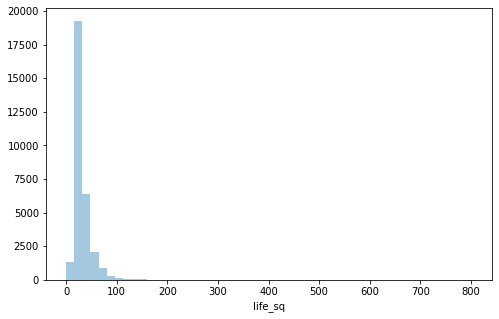

In [116]:
f, ax = plt.subplots(figsize=(8, 5))
sns.distplot(new_data2.life_sq, bins=50, kde=False,ax=ax)
plt.show()

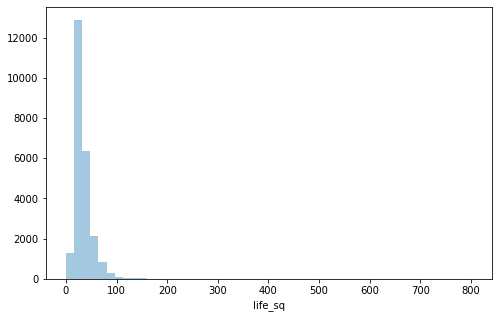

In [117]:
f, ax = plt.subplots(figsize=(8, 5))
sns.distplot(train.life_sq, bins=50, kde=False,ax=ax)
plt.show()

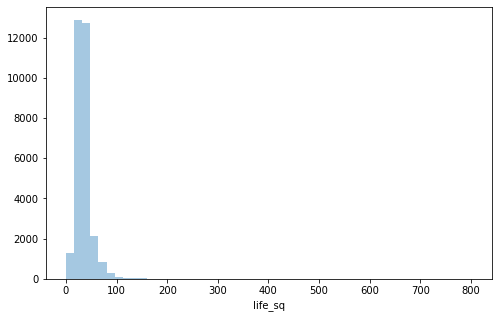

In [125]:
f, ax = plt.subplots(figsize=(8, 5))
sns.distplot(new_data.life_sq, bins=50, kde=False,ax=ax)
plt.show()

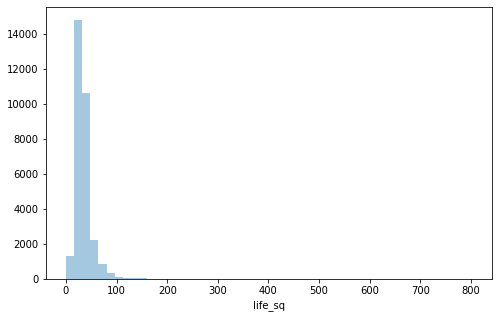

In [140]:
f, ax = plt.subplots(figsize=(8, 5))
sns.distplot(new_data3.life_sq, bins=50, kde=False,ax=ax)
plt.show()

In [136]:
#new_data3 = train[['life_sq']].copy()
new_data3 = train[['life_sq','full_sq']].copy()
# make new columns indicating what will be imputed
cols_with_missing = (col for col in new_data3.columns 
                                 if new_data3[col].isnull().any())

for col in cols_with_missing:
    new_data3[col + '_was_missing'] = new_data3[col].isnull()

new_data_col_name = new_data3.columns

In [130]:
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer

In [137]:
from sklearn.impute import IterativeImputer
my_imputer = IterativeImputer(max_iter=10, random_state=0)
new_data3 = pd.DataFrame(my_imputer.fit_transform(new_data3))

In [139]:
new_data3.columns = new_data_col_name
new_data3

,life_sq,full_sq,life_sq_was_missing
0,27.000000,43.0,0.0
1,19.000000,34.0,0.0
2,29.000000,43.0,0.0
3,50.000000,89.0,0.0
4,77.000000,77.0,0.0
...,...,...,...
30465,27.000000,44.0,0.0
30466,59.000000,86.0,0.0
30467,32.475926,45.0,1.0
30468,32.000000,64.0,0.0


In [151]:
new_data4 = train[['life_sq','sub_area']].copy()
new_data4

,life_sq,sub_area
0,27.0,Bibirevo
1,19.0,Nagatinskij Zaton
2,29.0,Tekstil'shhiki
3,50.0,Mitino
4,77.0,Basmannoe
...,...,...
30466,27.0,Otradnoe
30467,59.0,Tverskoe
30468,NaN,Poselenie Vnukovskoe
30469,32.0,Obruchevskoe


In [153]:
new_data4["life_sq"] = new_data4.groupby("sub_area").transform(lambda x: x.fillna(x.mean()))
new_data4["life_sq"]

0        27.000000
1        19.000000
2        29.000000
3        50.000000
4        77.000000
           ...    
30466    27.000000
30467    59.000000
30468    49.165657
30469    32.000000
30470    28.000000
Name: life_sq, Length: 30470, dtype: float64

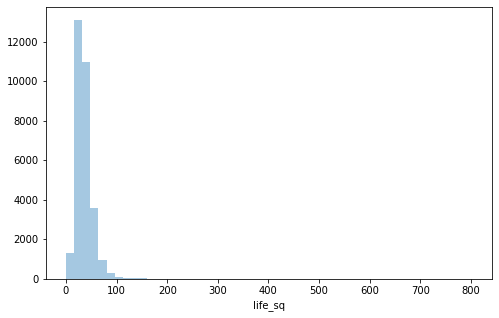

In [154]:
f, ax = plt.subplots(figsize=(8, 5))
sns.distplot(new_data4.life_sq, bins=50, kde=False,ax=ax)
plt.show()

# Initial Modeling <a name="modeling"></a>

In [7]:
train_clean = train
train_clean = train_clean[train_clean["life_sq"] != 7478]
train_clean = train_clean[train_clean["build_year"] !=0]
train_clean = train_clean[train_clean["build_year"] !=1]
train_clean = train_clean[train_clean["build_year"] !=3]
train_clean = train_clean[train_clean["build_year"] !=20]
train_clean = train_clean[train_clean["build_year"] !=71]
train_clean = train_clean[train_clean["build_year"] !=215]
train_clean = train_clean[train_clean["build_year"] !=4965]
train_clean = train_clean[train_clean["build_year"] !=20052009]
train_clean = train_clean[train_clean["state"] != 33]

train_clean = train_clean[train_clean["floor"] !=0]
train_clean = train_clean[train_clean["max_floor"] !=0]
train_clean = train_clean[train_clean["num_room"] !=0]
train_clean = train_clean[train_clean["kitch_sq"] !=0]
train_clean = train_clean[train_clean["industrial_km"] !=0]
train_clean = train_clean[train_clean["cemetery_km"] !=0]
train_clean = train_clean[train_clean["green_zone_km"] !=0]

In [8]:
train_clean = train_clean[train_clean["full_sq"] !=5326]
train_clean.shape

(27192, 292)

In [11]:
train_clean['timestamp'] = pd.to_datetime(train_clean['timestamp'])
train_clean['yearmonth'] = train_clean['timestamp'].dt.year*100 + train_clean['timestamp'].dt.month
train_clean['yearmonth']

0        201108
1        201108
2        201108
3        201109
4        201109
          ...  
30466    201506
30467    201506
30468    201506
30469    201506
30470    201506
Name: yearmonth, Length: 27192, dtype: int64

In [12]:
# year
train_clean['year'] = train_clean['timestamp'].dt.year

# month of year
train_clean['month_of_year'] = train_clean['timestamp'].dt.month

In [81]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

imput_target = train_clean.price_doc
imput_predictors = train_clean.drop(['price_doc'], axis=1)

# For the sake of keeping the example simple, we'll use only numeric predictors. 
imput_numeric_predictors = imput_predictors.select_dtypes(exclude=['object'])
imput_numeric_predictors = imput_numeric_predictors.drop(['timestamp'], axis=1)
imput_numeric_predictors = imput_numeric_predictors.drop(['id'], axis=1)

In [15]:
# For the sake of keeping the example simple, we'll use only numeric predictors. 
imput_cat_predictors = imput_predictors.select_dtypes(exclude=['int64'])
imput_cat_predictors = imput_cat_predictors.select_dtypes(exclude=['float64'])
imput_cat_predictors = imput_cat_predictors.drop(['timestamp'], axis=1)
imput_cat_predictors

,product_type,sub_area,culture_objects_top_25,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,water_1line,big_road1_1line,railroad_1line,ecology
0,Investment,Bibirevo,no,no,no,no,no,no,no,no,no,no,no,no,good
1,Investment,Nagatinskij Zaton,yes,no,no,no,no,no,no,no,no,no,no,no,excellent
2,Investment,Tekstil'shhiki,no,no,no,no,yes,no,no,no,no,no,no,no,poor
3,Investment,Mitino,no,no,no,no,no,no,no,no,no,no,no,no,good
4,Investment,Basmannoe,no,no,no,no,yes,yes,no,no,no,no,no,yes,excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,Investment,Otradnoe,no,no,yes,no,yes,no,no,no,no,no,no,no,good
30467,Investment,Tverskoe,yes,no,no,no,yes,yes,no,no,yes,no,no,no,poor
30468,OwnerOccupier,Poselenie Vnukovskoe,no,no,no,no,no,no,no,no,no,no,no,no,no data
30469,Investment,Obruchevskoe,no,no,no,no,yes,no,no,no,no,no,no,no,satisfactory


In [17]:
#one hot encode categorical variables
imput_cat_predictors_onehot = pd.get_dummies(data=imput_cat_predictors,drop_first=True)
imput_cat_predictors_onehot

,product_type_OwnerOccupier,sub_area_Akademicheskoe,sub_area_Alekseevskoe,sub_area_Altuf'evskoe,sub_area_Arbat,sub_area_Babushkinskoe,sub_area_Basmannoe,sub_area_Begovoe,sub_area_Beskudnikovskoe,sub_area_Bibirevo,...,big_market_raion_yes,nuclear_reactor_raion_yes,detention_facility_raion_yes,water_1line_yes,big_road1_1line_yes,railroad_1line_yes,ecology_good,ecology_no data,ecology_poor,ecology_satisfactory
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
30467,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
30468,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
30469,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [19]:
from sklearn.impute import SimpleImputer

my_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputed_numeric_predictors_fill = my_imputer.fit_transform(imput_numeric_predictors)
numeric_col = imput_numeric_predictors.columns
imputed_numeric_predictors_fill = pd.DataFrame(imputed_numeric_predictors_fill)
imputed_numeric_predictors_fill.columns = numeric_col
imputed_numeric_predictors_fill

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,yearmonth,year,month_of_year
0,43.0,27.000000,4.0,12.806167,1.840071,1984.391051,1.926058,7.098589,2.186234,6.407578e+06,...,0.0,13.0,22.0,1.0,0.0,52.0,4.0,201108.0,2011.0,8.0
1,34.0,19.000000,3.0,12.806167,1.840071,1984.391051,1.926058,7.098589,2.186234,9.589337e+06,...,0.0,15.0,29.0,1.0,10.0,66.0,14.0,201108.0,2011.0,8.0
2,43.0,29.000000,2.0,12.806167,1.840071,1984.391051,1.926058,7.098589,2.186234,4.808270e+06,...,0.0,11.0,27.0,0.0,4.0,67.0,10.0,201108.0,2011.0,8.0
3,89.0,50.000000,9.0,12.806167,1.840071,1984.391051,1.926058,7.098589,2.186234,1.258354e+07,...,1.0,4.0,4.0,0.0,0.0,26.0,3.0,201109.0,2011.0,9.0
4,77.0,77.000000,4.0,12.806167,1.840071,1984.391051,1.926058,7.098589,2.186234,8.398461e+06,...,17.0,135.0,236.0,2.0,91.0,195.0,14.0,201109.0,2011.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27187,44.0,27.000000,7.0,9.000000,1.000000,1975.000000,2.000000,6.000000,3.000000,1.005305e+07,...,0.0,15.0,26.0,1.0,2.0,84.0,6.0,201506.0,2015.0,6.0
27188,86.0,59.000000,3.0,9.000000,2.000000,1935.000000,4.000000,10.000000,3.000000,7.307411e+06,...,24.0,98.0,182.0,1.0,82.0,171.0,15.0,201506.0,2015.0,6.0
27189,45.0,33.410724,10.0,20.000000,1.000000,1984.391051,1.000000,1.000000,1.000000,2.553630e+07,...,0.0,2.0,12.0,0.0,1.0,11.0,1.0,201506.0,2015.0,6.0
27190,64.0,32.000000,5.0,15.000000,1.000000,2003.000000,2.000000,11.000000,2.000000,6.050065e+06,...,1.0,6.0,31.0,1.0,4.0,65.0,7.0,201506.0,2015.0,6.0


In [22]:
imput_cat_predictors_onehot = imput_cat_predictors_onehot.reset_index()
imputed_all_predictors_mean = pd.concat([pd.DataFrame(imputed_numeric_predictors_fill), pd.DataFrame(imput_cat_predictors_onehot)], axis=1)
imputed_all_predictors_mean

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,big_market_raion_yes,nuclear_reactor_raion_yes,detention_facility_raion_yes,water_1line_yes,big_road1_1line_yes,railroad_1line_yes,ecology_good,ecology_no data,ecology_poor,ecology_satisfactory
0,43.0,27.000000,4.0,12.806167,1.840071,1984.391051,1.926058,7.098589,2.186234,6.407578e+06,...,0,0,0,0,0,0,1,0,0,0
1,34.0,19.000000,3.0,12.806167,1.840071,1984.391051,1.926058,7.098589,2.186234,9.589337e+06,...,0,0,0,0,0,0,0,0,0,0
2,43.0,29.000000,2.0,12.806167,1.840071,1984.391051,1.926058,7.098589,2.186234,4.808270e+06,...,0,0,0,0,0,0,0,0,1,0
3,89.0,50.000000,9.0,12.806167,1.840071,1984.391051,1.926058,7.098589,2.186234,1.258354e+07,...,0,0,0,0,0,0,1,0,0,0
4,77.0,77.000000,4.0,12.806167,1.840071,1984.391051,1.926058,7.098589,2.186234,8.398461e+06,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27187,44.0,27.000000,7.0,9.000000,1.000000,1975.000000,2.000000,6.000000,3.000000,1.005305e+07,...,0,0,0,0,0,0,1,0,0,0
27188,86.0,59.000000,3.0,9.000000,2.000000,1935.000000,4.000000,10.000000,3.000000,7.307411e+06,...,0,0,1,0,0,0,0,0,1,0
27189,45.0,33.410724,10.0,20.000000,1.000000,1984.391051,1.000000,1.000000,1.000000,2.553630e+07,...,0,0,0,0,0,0,0,1,0,0
27190,64.0,32.000000,5.0,15.000000,1.000000,2003.000000,2.000000,11.000000,2.000000,6.050065e+06,...,0,0,0,0,0,0,0,0,0,1


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(imputed_all_predictors_mean, imput_target, test_size=0.33, random_state=42)

In [24]:
from sklearn.metrics import mean_absolute_error, make_scorer, mean_squared_error
def score_dataset(X_train, X_test, y_train, y_test):
    model = RandomForestRegressor()
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    return np.sqrt(mean_squared_error(y_test, preds))

In [25]:
print(score_dataset(X_train, X_test, y_train, y_test))

3095549.798617449


In [27]:
%%time
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.impute import IterativeImputer

my_imputer = IterativeImputer(max_iter=10, random_state=0)
imputed_numeric_predictors_filliter = my_imputer.fit_transform(imput_numeric_predictors)
numeric_col = imput_numeric_predictors.columns
imputed_numeric_predictors_filliter = pd.DataFrame(imputed_numeric_predictors_filliter)
imputed_numeric_predictors_filliter.columns = numeric_col
imputed_numeric_predictors_filliter

Wall time: 9min 55s


,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,yearmonth,year,month_of_year
0,43.0,27.000000,4.0,11.761807,1.226448,1975.905711,1.717507,8.100795,2.703386,6.407578e+06,...,0.0,13.0,22.0,1.0,0.0,52.0,4.0,201108.0,2011.0,8.0
1,34.0,19.000000,3.0,12.403188,1.839586,1969.386241,1.338153,7.464441,2.447517,9.589337e+06,...,0.0,15.0,29.0,1.0,10.0,66.0,14.0,201108.0,2011.0,8.0
2,43.0,29.000000,2.0,11.483331,2.019079,1970.423253,1.684717,7.488851,2.344300,4.808270e+06,...,0.0,11.0,27.0,0.0,4.0,67.0,10.0,201108.0,2011.0,8.0
3,89.0,50.000000,9.0,14.363509,1.837889,2003.988409,3.085552,7.538131,2.212265,1.258354e+07,...,1.0,4.0,4.0,0.0,0.0,26.0,3.0,201109.0,2011.0,9.0
4,77.0,77.000000,4.0,11.193528,2.340158,1952.993654,2.703630,9.068640,2.487243,8.398461e+06,...,17.0,135.0,236.0,2.0,91.0,195.0,14.0,201109.0,2011.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27187,44.0,27.000000,7.0,9.000000,1.000000,1975.000000,2.000000,6.000000,3.000000,1.005305e+07,...,0.0,15.0,26.0,1.0,2.0,84.0,6.0,201506.0,2015.0,6.0
27188,86.0,59.000000,3.0,9.000000,2.000000,1935.000000,4.000000,10.000000,3.000000,7.307411e+06,...,24.0,98.0,182.0,1.0,82.0,171.0,15.0,201506.0,2015.0,6.0
27189,45.0,38.583805,10.0,20.000000,1.000000,2019.384335,1.000000,1.000000,1.000000,2.553630e+07,...,0.0,2.0,12.0,0.0,1.0,11.0,1.0,201506.0,2015.0,6.0
27190,64.0,32.000000,5.0,15.000000,1.000000,2003.000000,2.000000,11.000000,2.000000,6.050065e+06,...,1.0,6.0,31.0,1.0,4.0,65.0,7.0,201506.0,2015.0,6.0


In [28]:
imput_cat_predictors_onehot = imput_cat_predictors_onehot.reset_index()
imputed_all_predictors_iter = pd.concat([pd.DataFrame(imputed_numeric_predictors_filliter), pd.DataFrame(imput_cat_predictors_onehot)], axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(imputed_all_predictors_iter, imput_target, test_size=0.33, random_state=42)
print(score_dataset(X_train, X_test, y_train, y_test))

3097132.122818364


In [85]:
dict = {}
temp = imput_numeric_predictors
dict = temp.columns[temp.isnull().any()].tolist()

In [87]:
imput_numeric_predictors_fillmin1[dict] = imput_numeric_predictors_fillmin1[dict].fillna(-1)
imput_numeric_predictors

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,yearmonth,year,month_of_year
0,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,6.407578e+06,...,0,13,22,1,0,52,4,201108,2011,8
1,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,9.589337e+06,...,0,15,29,1,10,66,14,201108,2011,8
2,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,4.808270e+06,...,0,11,27,0,4,67,10,201108,2011,8
3,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,1.258354e+07,...,1,4,4,0,0,26,3,201109,2011,9
4,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,8.398461e+06,...,17,135,236,2,91,195,14,201109,2011,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,44,27.0,7.0,9.0,1.0,1975.0,2.0,6.0,3.0,1.005305e+07,...,0,15,26,1,2,84,6,201506,2015,6
30467,86,59.0,3.0,9.0,2.0,1935.0,4.0,10.0,3.0,7.307411e+06,...,24,98,182,1,82,171,15,201506,2015,6
30468,45,NaN,10.0,20.0,1.0,NaN,1.0,1.0,1.0,2.553630e+07,...,0,2,12,0,1,11,1,201506,2015,6
30469,64,32.0,5.0,15.0,1.0,2003.0,2.0,11.0,2.0,6.050065e+06,...,1,6,31,1,4,65,7,201506,2015,6


In [78]:
dict = {}
temp = imput_numeric_predictors
dict = temp.columns[temp.isnull().any()].tolist()
#impute russian housing dataset missing data with -1
imput_numeric_predictors_fillmin1=temp
imput_numeric_predictors_fillmin1[dict] = imput_numeric_predictors_fillmin1[dict].fillna(-1)
imput_numeric_predictors_fillmin1

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,yearmonth,year,month_of_year
0,43,27.0,4.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,6.407578e+06,...,0,13,22,1,0,52,4,201108,2011,8
1,34,19.0,3.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,9.589337e+06,...,0,15,29,1,10,66,14,201108,2011,8
2,43,29.0,2.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,4.808270e+06,...,0,11,27,0,4,67,10,201108,2011,8
3,89,50.0,9.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.258354e+07,...,1,4,4,0,0,26,3,201109,2011,9
4,77,77.0,4.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,8.398461e+06,...,17,135,236,2,91,195,14,201109,2011,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,44,27.0,7.0,9.0,1.0,1975.0,2.0,6.0,3.0,1.005305e+07,...,0,15,26,1,2,84,6,201506,2015,6
30467,86,59.0,3.0,9.0,2.0,1935.0,4.0,10.0,3.0,7.307411e+06,...,24,98,182,1,82,171,15,201506,2015,6
30468,45,-1.0,10.0,20.0,1.0,-1.0,1.0,1.0,1.0,2.553630e+07,...,0,2,12,0,1,11,1,201506,2015,6
30469,64,32.0,5.0,15.0,1.0,2003.0,2.0,11.0,2.0,6.050065e+06,...,1,6,31,1,4,65,7,201506,2015,6


In [33]:
imput_numeric_predictors_fillmin1 = imput_numeric_predictors_fillmin1.reset_index()

In [35]:
imput_numeric_predictors_fillmin1

,index,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,yearmonth,year,month_of_year
0,0,43,27.0,4.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,0,13,22,1,0,52,4,201108,2011,8
1,1,34,19.0,3.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,0,15,29,1,10,66,14,201108,2011,8
2,2,43,29.0,2.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,0,11,27,0,4,67,10,201108,2011,8
3,3,89,50.0,9.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1,4,4,0,0,26,3,201109,2011,9
4,4,77,77.0,4.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,17,135,236,2,91,195,14,201109,2011,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27187,30466,44,27.0,7.0,9.0,1.0,1975.0,2.0,6.0,3.0,...,0,15,26,1,2,84,6,201506,2015,6
27188,30467,86,59.0,3.0,9.0,2.0,1935.0,4.0,10.0,3.0,...,24,98,182,1,82,171,15,201506,2015,6
27189,30468,45,-1.0,10.0,20.0,1.0,-1.0,1.0,1.0,1.0,...,0,2,12,0,1,11,1,201506,2015,6
27190,30469,64,32.0,5.0,15.0,1.0,2003.0,2.0,11.0,2.0,...,1,6,31,1,4,65,7,201506,2015,6


In [38]:
imput_cat_predictors_onehot.drop(['level_0'],inplace=True, axis=1)

In [39]:
imput_cat_predictors_onehot

,index,product_type_OwnerOccupier,sub_area_Akademicheskoe,sub_area_Alekseevskoe,sub_area_Altuf'evskoe,sub_area_Arbat,sub_area_Babushkinskoe,sub_area_Basmannoe,sub_area_Begovoe,sub_area_Beskudnikovskoe,...,big_market_raion_yes,nuclear_reactor_raion_yes,detention_facility_raion_yes,water_1line_yes,big_road1_1line_yes,railroad_1line_yes,ecology_good,ecology_no data,ecology_poor,ecology_satisfactory
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,4,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27187,30466,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
27188,30467,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
27189,30468,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
27190,30469,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [40]:
imputed_all_predictors_min1 = pd.concat([pd.DataFrame(imput_numeric_predictors_fillmin1), pd.DataFrame(imput_cat_predictors_onehot)], axis=1)
from sklearn.model_selection import train_test_split

In [41]:
#imput_cat_predictors_onehot = imput_cat_predictors_onehot.reset_index()
#imputed_all_predictors_min1 = pd.concat([pd.DataFrame(imput_numeric_predictors_fillmin1), pd.DataFrame(imput_cat_predictors_onehot)], axis=1)
#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(imputed_all_predictors_min1, imput_target, test_size=0.33, random_state=42)
print(score_dataset(X_train, X_test, y_train, y_test))

3090829.972884386


In [49]:
imput_target = imput_target.reset_index()
all_combine = pd.concat([imputed_numeric_predictors_filliter, imput_target], axis=1)
all_combine

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,yearmonth,year,month_of_year,index,price_doc
0,43.0,27.000000,4.0,11.761807,1.226448,1975.905711,1.717507,8.100795,2.703386,6.407578e+06,...,22.0,1.0,0.0,52.0,4.0,201108.0,2011.0,8.0,0,5850000
1,34.0,19.000000,3.0,12.403188,1.839586,1969.386241,1.338153,7.464441,2.447517,9.589337e+06,...,29.0,1.0,10.0,66.0,14.0,201108.0,2011.0,8.0,1,6000000
2,43.0,29.000000,2.0,11.483331,2.019079,1970.423253,1.684717,7.488851,2.344300,4.808270e+06,...,27.0,0.0,4.0,67.0,10.0,201108.0,2011.0,8.0,2,5700000
3,89.0,50.000000,9.0,14.363509,1.837889,2003.988409,3.085552,7.538131,2.212265,1.258354e+07,...,4.0,0.0,0.0,26.0,3.0,201109.0,2011.0,9.0,3,13100000
4,77.0,77.000000,4.0,11.193528,2.340158,1952.993654,2.703630,9.068640,2.487243,8.398461e+06,...,236.0,2.0,91.0,195.0,14.0,201109.0,2011.0,9.0,4,16331452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27187,44.0,27.000000,7.0,9.000000,1.000000,1975.000000,2.000000,6.000000,3.000000,1.005305e+07,...,26.0,1.0,2.0,84.0,6.0,201506.0,2015.0,6.0,30466,7400000
27188,86.0,59.000000,3.0,9.000000,2.000000,1935.000000,4.000000,10.000000,3.000000,7.307411e+06,...,182.0,1.0,82.0,171.0,15.0,201506.0,2015.0,6.0,30467,25000000
27189,45.0,38.583805,10.0,20.000000,1.000000,2019.384335,1.000000,1.000000,1.000000,2.553630e+07,...,12.0,0.0,1.0,11.0,1.0,201506.0,2015.0,6.0,30468,6970959
27190,64.0,32.000000,5.0,15.000000,1.000000,2003.000000,2.000000,11.000000,2.000000,6.050065e+06,...,31.0,1.0,4.0,65.0,7.0,201506.0,2015.0,6.0,30469,13500000


In [50]:
#all_combine = pd.concat([imputed_numeric_predictors_filliter, imput_target], axis=1)
samp_feature = all_combine.sample(2000)
samp_y = samp_feature['price_doc']
samp_feature_clean = samp_feature.drop(['price_doc'],inplace=True, axis=1)

from sklearn.ensemble import ExtraTreesRegressor
forest = ExtraTreesRegressor()

forest.fit(samp_feature, samp_y)
importances = forest.feature_importances_

ExtraTreesRegressor()

<Figure size 720x3240 with 0 Axes>

<BarContainer object of 278 artists>

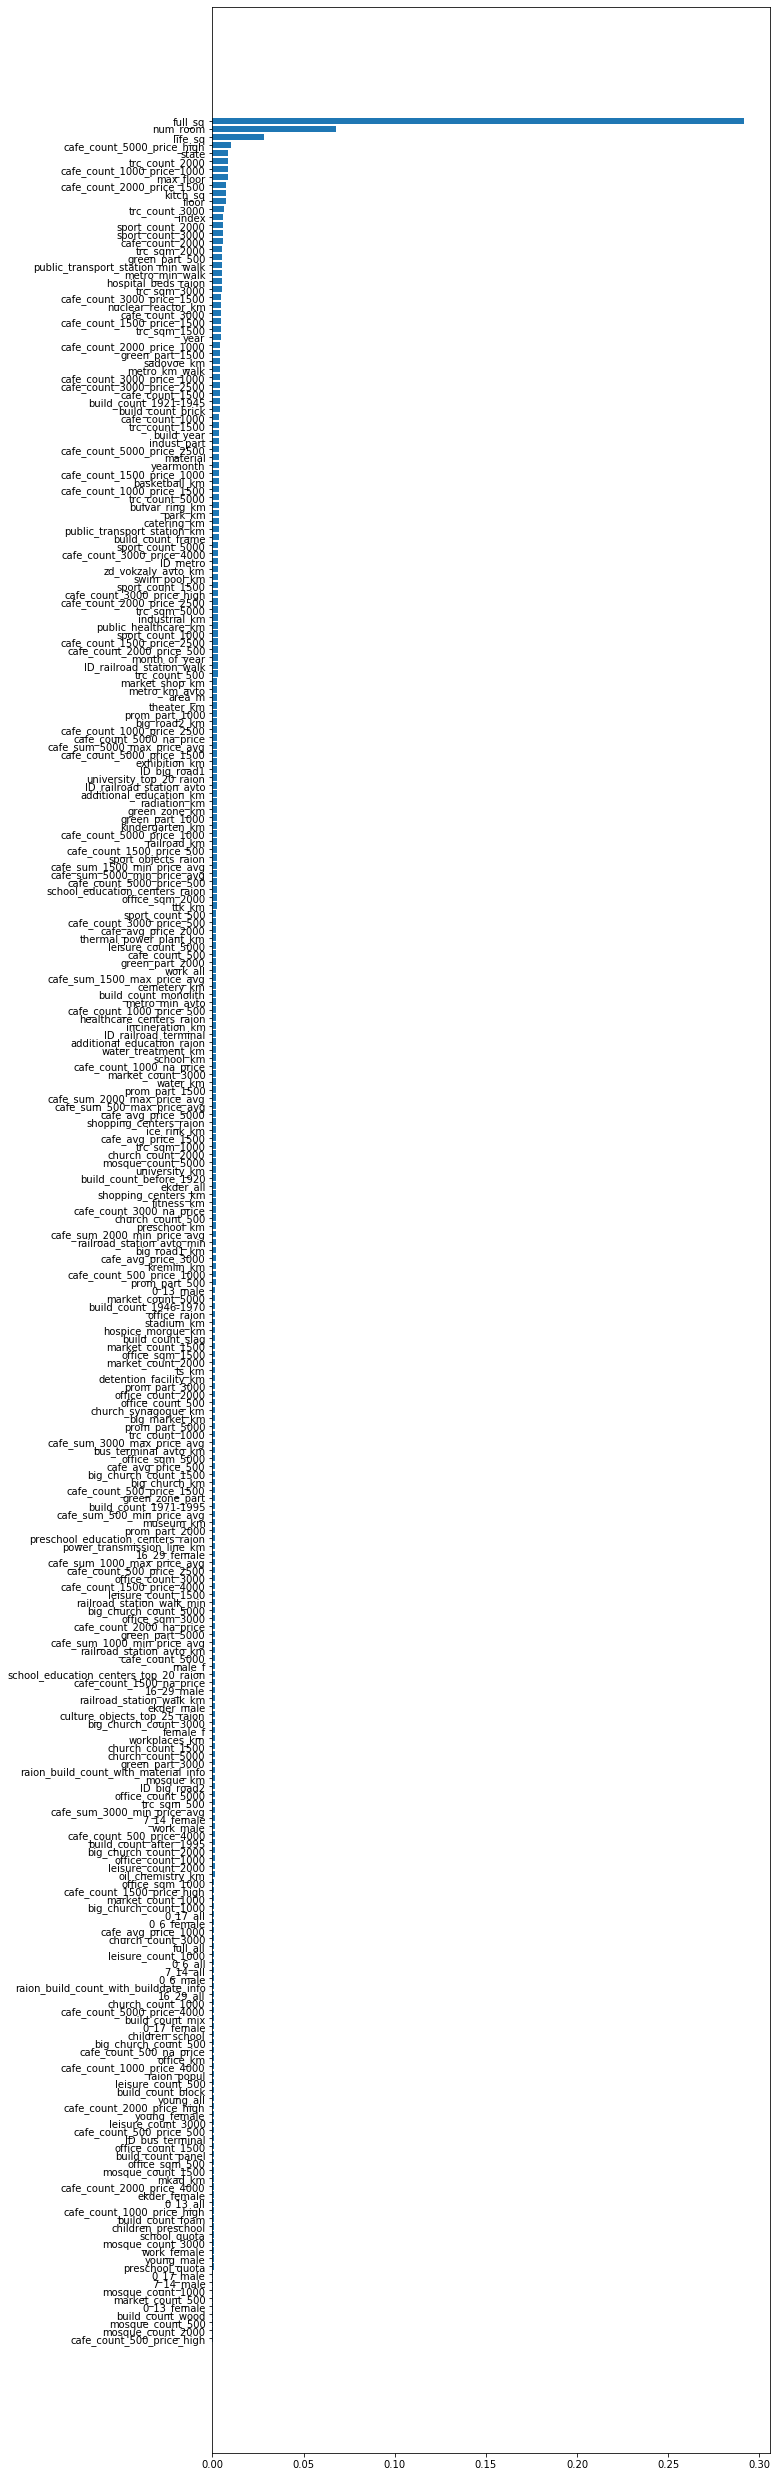

In [51]:
sorted_idx = forest.feature_importances_.argsort()

plt.figure(figsize=(10,45))
plt.barh(samp_feature.columns[sorted_idx], importances[sorted_idx])

In [ ]:
from sklearn.impute import SimpleImputer

my_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputed_numeric_predictors_fill = my_imputer.fit_transform(imput_numeric_predictors)
numeric_col = imput_numeric_predictors.columns
imputed_numeric_predictors_fill = pd.DataFrame(imputed_numeric_predictors_fill)
imputed_numeric_predictors_fill.columns = numeric_col
imputed_numeric_predictors_fill

In [91]:
pd.options.display.min_rows = 290
imput_numeric_predictors.dtypes

full_sq                                    int64
life_sq                                  float64
floor                                    float64
max_floor                                float64
material                                 float64
build_year                               float64
num_room                                 float64
kitch_sq                                 float64
state                                    float64
area_m                                   float64
raion_popul                                int64
green_zone_part                          float64
indust_part                              float64
children_preschool                         int64
preschool_quota                          float64
preschool_education_centers_raion          int64
children_school                            int64
school_quota                             float64
school_education_centers_raion             int64
school_education_centers_top_20_raion      int64
hospital_beds_raion 

## Modeling and CrossValidation <a name="min1"></a>

In [36]:
from sklearn.impute import SimpleImputer
impNumeric = SimpleImputer(missing_values=np.nan, strategy='mean')
impCategorical = SimpleImputer(missing_values=np.nan, 
                               strategy='most_frequent')

In [43]:
imputed_numeric_predictors = df.select_dtypes(exclude=['object'])
imputed_numeric_predictors = imputed_numeric_predictors.select_dtypes(exclude=['int64'])
imput_cat_predictors = df.select_dtypes(exclude=['int64'])
imput_cat_predictors = imput_cat_predictors.select_dtypes(exclude=['float64'])
imput_cat_predictors_onehot = pd.get_dummies(data=pd.DataFrame(imput_cat_predictors),drop_first=True)
imputed_cat_predictors_onehot = pd.concat([pd.DataFrame(df.select_dtypes(include=['int64'])), pd.DataFrame(imput_cat_predictors_onehot)], axis=1)

imput_cat_predictors_onehot = impCategorical.fit(imput_cat_predictors_onehot).transform(imput_cat_predictors_onehot)


imputed_numeric_predictors = impNumeric.fit(imputed_numeric_predictors).transform(imputed_numeric_predictors)

# For the sake of keeping the example simple, we'll use only numeric predictors. 
imputed_all_predictors = pd.concat([pd.DataFrame(imputed_numeric_predictors), pd.DataFrame(imput_cat_predictors_onehot)], axis=1)
imputed_all_predictors.head()
#imputed_all_predictors = imputed_all_predictors.drop(['id','price_doc'], axis=1)
imput_target = df['price_doc']

,0,1,2,3,4,5,6,7,8,9,...,1312,1313,1314,1315,1316,1317,1318,1319,1320,1321
0,27.0,4.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,6.407578e+06,0.189727,...,0,0,0,0,0,0,1,0,0,0
1,19.0,3.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,9.589337e+06,0.372602,...,0,0,0,0,0,0,0,0,0,0
2,29.0,2.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,4.808270e+06,0.112560,...,0,0,0,0,0,0,0,0,1,0
3,50.0,9.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,1.258354e+07,0.194703,...,0,0,0,0,0,0,1,0,0,0
4,77.0,4.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,8.398461e+06,0.015234,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
param_grid = { 
    'n_estimators': [100, 300],
    'max_features': ['auto'],
    'max_depth' : [5, 9],
    'criterion' :['mse']
}

In [9]:
X_train, X_test, y_train, y_test = train_test_split(imputed_all_predictors, imput_target, test_size=0.33, random_state=42)

In [10]:
# Used this code to run best guess imputation with best_parms_ results from best guess imputation
CV_rfc=RandomForestRegressor(random_state=42, n_estimators = 300, max_features='auto',max_depth=9, criterion='mse')
CV_rfc.fit(X_train, y_train)

RandomForestRegressor(max_depth=9, n_estimators=300, random_state=42)

In [11]:
# Predicting the Test set results
y_pred = CV_rfc.predict(X_test)

In [12]:
# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1689869.3790997753
Mean Squared Error: 8975130398503.463
Root Mean Squared Error: 2995852.199041779


### Impute -1

In [13]:
train_org = train
df = train

In [14]:
dict = {}
dict = df.columns[df.isnull().any()].tolist()

In [15]:
#create dict of columns that contain null values
dict = {}
dict = df.columns[df.isnull().any()].tolist()

#impute russian housing dataset missing data with -1
df[dict] = df[dict].fillna(-1)

In [16]:
# For the sake of keeping the example simple, we'll use only numeric predictors. 
#imputed_numeric_predictors = df.select_dtypes(exclude=['object'])
imput_cat_predictors = df.select_dtypes(exclude=['int64'])
imput_cat_predictors = imput_cat_predictors.select_dtypes(exclude=['float64'])
imput_cat_predictors_onehot = pd.get_dummies(data=pd.DataFrame(imput_cat_predictors),drop_first=True)
imputed_all_predictors = pd.concat([pd.DataFrame(imputed_numeric_predictors), pd.DataFrame(imput_cat_predictors_onehot)], axis=1)
imputed_all_predictors = imputed_all_predictors.drop(['id','price_doc'], axis=1)
imput_target = df['price_doc']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(imputed_all_predictors, imput_target, test_size=0.33, random_state=42)

In [19]:
# Used best_parms_ results from best guess imputation
rfc=RandomForestRegressor(random_state=42, n_estimators = 300, max_features='auto',max_depth=9, criterion='mse')
rfc.fit(X_train, y_train)

RandomForestRegressor(max_depth=9, n_estimators=300, random_state=42)

In [21]:
# Predicting the Test set results
y_pred = rfc.predict(X_test)

In [22]:
# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1457444.7108329493
Mean Squared Error: 7132596187676.536
Root Mean Squared Error: 2670692.080281165


In [31]:
X_train.iloc[:, 1:100]

,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,raion_popul,...,public_transport_station_km,public_transport_station_min_walk,water_km,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1
20920,19.0,8.0,12.0,5.0,1967.0,1.0,9.0,3.0,1.509487e+07,219609,...,0.102600,1.231203,0.612300,2.321123,5.608437,9.627993,10.449377,11.752747,1.735983,3
16726,28.0,7.0,9.0,1.0,1977.0,2.0,6.0,2.0,1.803644e+07,166803,...,0.185628,2.227539,0.755307,6.640780,3.727708,6.794803,7.639656,8.786907,0.377737,35
22203,-1.0,11.0,18.0,1.0,-1.0,2.0,1.0,-1.0,1.084231e+07,85219,...,0.103967,1.247606,0.244127,18.188541,31.694916,34.329947,35.110523,36.355608,4.854495,14
30135,42.0,6.0,12.0,1.0,1973.0,3.0,6.0,2.0,8.338438e+06,94236,...,0.178163,2.137953,0.521395,0.806808,10.066816,12.585368,13.229183,14.870495,0.164441,15
29957,41.0,14.0,17.0,1.0,2016.0,1.0,10.0,1.0,1.258354e+07,178473,...,0.121737,1.460844,0.749486,1.744856,13.925936,16.724174,17.566463,18.752843,1.744856,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29802,-1.0,15.0,17.0,1.0,-1.0,3.0,1.0,-1.0,2.553630e+07,4001,...,0.630014,7.560163,0.394422,7.123215,17.148737,19.868997,21.038561,21.905792,2.808077,13
5390,38.0,10.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.139168e+07,19940,...,0.107706,1.292466,0.925372,5.628641,13.597146,17.579929,18.324596,19.691904,3.481845,11
860,41.0,4.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.509487e+07,219609,...,0.155707,1.868483,0.806735,0.726773,7.144980,11.278528,12.171133,13.410574,0.726773,1
15795,33.0,2.0,17.0,1.0,-1.0,2.0,12.0,1.0,1.139168e+07,19940,...,0.035986,0.431838,1.110329,5.946908,14.298225,18.418929,19.272537,20.549464,1.905125,11


In [32]:
rfc2=RandomForestRegressor(random_state=42, n_estimators = 300, max_features='auto',max_depth=9, criterion='mse')
rfc2.fit(X_train.iloc[:, 1:100], y_train)
y_pred = rfc2.predict(X_test.iloc[:, 1:100])
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RandomForestRegressor(max_depth=9, n_estimators=300, random_state=42)

Mean Absolute Error: 1670200.2405514566
Mean Squared Error: 8923850708924.008
Root Mean Squared Error: 2987281.4914105446


### Use Median for Integer Variables

In [6]:
from sklearn.impute import SimpleImputer
impNumeric = SimpleImputer(missing_values=np.nan, strategy='mean')
impInt = SimpleImputer(missing_values=np.nan, strategy='median')
impCategorical = SimpleImputer(missing_values=np.nan, 
                               strategy='most_frequent')

In [8]:
%%time
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.impute import IterativeImputer
impIter = IterativeImputer(max_iter=10, random_state=0)

Wall time: 16 ms


In [12]:
imput_target = df['price_doc']
df = df.drop(['id','timestamp','price_doc'], axis=1)
imputed_numeric_predictors = df.select_dtypes(include=['float64'])
imputed_int_predictors = df.select_dtypes(include=['int64'])
imput_cat_predictors = df.select_dtypes(include=['object'])
imput_cat_predictors_onehot = pd.get_dummies(data=pd.DataFrame(imput_cat_predictors),drop_first=True)

imputed_int_predictors_iter = impIter.fit(imputed_int_predictors).transform(imputed_int_predictors)

In [21]:
imputed_numeric_predictors_iter = impIter.fit(imputed_numeric_predictors).transform(imputed_numeric_predictors)

In [22]:
imput_cat_predictors_onehot = impCategorical.fit(imput_cat_predictors_onehot).transform(imput_cat_predictors_onehot)
#imputed_numeric_predictors = impNumeric.fit(imputed_numeric_predictors).transform(imputed_numeric_predictors)

# For the sake of keeping the example simple, we'll use only numeric predictors. 
imputed_all_predictors = pd.concat([pd.DataFrame(imputed_int_predictors_iter), pd.DataFrame(imputed_numeric_predictors_iter), pd.DataFrame(imput_cat_predictors_onehot)], axis=1)
imputed_all_predictors.head()

,0,1,2,3,4,5,6,7,8,9,...,152,153,154,155,156,157,158,159,160,161
0,43.0,155572.0,9576.0,5.0,10309.0,5.0,0.0,1.0,0.0,7.0,...,0,0,0,0,0,0,1,0,0,0
1,34.0,115352.0,6880.0,5.0,7759.0,8.0,0.0,1.0,0.0,6.0,...,0,0,0,0,0,0,0,0,0,0
2,43.0,101708.0,5879.0,4.0,6207.0,7.0,0.0,1.0,0.0,5.0,...,0,0,0,0,0,0,0,0,1,0
3,89.0,178473.0,13087.0,9.0,13670.0,10.0,0.0,1.0,0.0,17.0,...,0,0,0,0,0,0,1,0,0,0
4,77.0,108171.0,5706.0,7.0,6748.0,9.0,0.0,4.0,2.0,25.0,...,0,0,0,0,0,1,0,0,0,0


In [23]:
X_train, X_test, y_train, y_test = train_test_split(imputed_all_predictors, imput_target, test_size=0.33, random_state=42)

In [ ]:
#Use this code to run the grid search CV
#CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=3 )
#CV_rfc.fit(X_train, y_train)

In [24]:
# Used this code to run best guess imputation with best_parms_ results from best guess imputation
CV_rfc=RandomForestRegressor(random_state=42, n_estimators = 300, n_jobs=-1, max_features='auto',max_depth=12, criterion='mse')
CV_rfc.fit(X_train, y_train)

RandomForestRegressor(max_depth=12, n_estimators=300, n_jobs=-1,
                      random_state=42)

In [25]:
# Predicting the Test set results
y_pred = CV_rfc.predict(X_test)

In [26]:
# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1419657.9060870907
Mean Squared Error: 7001100357072.176
Root Mean Squared Error: 2645959.250833651


### Use Iterative Imputation

In [8]:
%%time
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.impute import IterativeImputer
impIter = IterativeImputer(max_iter=10, random_state=0)

Wall time: 16 ms


In [12]:
imput_target = df['price_doc']
df = df.drop(['id','timestamp','price_doc'], axis=1)
imputed_numeric_predictors = df.select_dtypes(include=['float64'])
imputed_int_predictors = df.select_dtypes(include=['int64'])
imput_cat_predictors = df.select_dtypes(include=['object'])
imput_cat_predictors_onehot = pd.get_dummies(data=pd.DataFrame(imput_cat_predictors),drop_first=True)

imputed_int_predictors_iter = impIter.fit(imputed_int_predictors).transform(imputed_int_predictors)

In [21]:
imputed_numeric_predictors_iter = impIter.fit(imputed_numeric_predictors).transform(imputed_numeric_predictors)

In [22]:
imput_cat_predictors_onehot = impCategorical.fit(imput_cat_predictors_onehot).transform(imput_cat_predictors_onehot)
#imputed_numeric_predictors = impNumeric.fit(imputed_numeric_predictors).transform(imputed_numeric_predictors)

# For the sake of keeping the example simple, we'll use only numeric predictors. 
imputed_all_predictors = pd.concat([pd.DataFrame(imputed_int_predictors_iter), pd.DataFrame(imputed_numeric_predictors_iter), pd.DataFrame(imput_cat_predictors_onehot)], axis=1)
imputed_all_predictors.head()

,0,1,2,3,4,5,6,7,8,9,...,152,153,154,155,156,157,158,159,160,161
0,43.0,155572.0,9576.0,5.0,10309.0,5.0,0.0,1.0,0.0,7.0,...,0,0,0,0,0,0,1,0,0,0
1,34.0,115352.0,6880.0,5.0,7759.0,8.0,0.0,1.0,0.0,6.0,...,0,0,0,0,0,0,0,0,0,0
2,43.0,101708.0,5879.0,4.0,6207.0,7.0,0.0,1.0,0.0,5.0,...,0,0,0,0,0,0,0,0,1,0
3,89.0,178473.0,13087.0,9.0,13670.0,10.0,0.0,1.0,0.0,17.0,...,0,0,0,0,0,0,1,0,0,0
4,77.0,108171.0,5706.0,7.0,6748.0,9.0,0.0,4.0,2.0,25.0,...,0,0,0,0,0,1,0,0,0,0


In [40]:
X_train, X_test, y_train, y_test = train_test_split(imputed_all_predictors, imput_target, test_size=0.33, random_state=42)

In [41]:
# Used best_parms_ results from best guess imputation
rfc=RandomForestRegressor(random_state=42, n_estimators = 300, n_jobs=-1, max_features='auto',max_depth=12, criterion='mse')
rfc.fit(X_train, y_train)

RandomForestRegressor(max_depth=12, n_estimators=300, n_jobs=-1,
                      random_state=42)

In [42]:
# Predicting the Test set results
y_pred = rfc.predict(X_test)

In [43]:
# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1416385.798874192
Mean Squared Error: 6997117696801.641
Root Mean Squared Error: 2645206.5508768195
